# Financial Data Visualisation Project

## Independent Project by Amit Kr Eshore
                                ## amitislinked@Linkedin

This project aim to focus on the data visualisation of different firms using the python language. The tools used here are popular and the idea is to implement what I learnt in data visualisation.

Here we will be focusing on the bank stocks and see how they performed in the secondary capital market.

### Let's start by importing the necessary libraries


In [9]:
import pandas as pd
import numpy as np
import datetime
import pickle


### Importing the Data

In [12]:
df = pd.read_pickle("C:\\Users\\24msceco01\\Desktop\\Jupyter Notebook\\all_banks.pkl")

### Now we will have stocks information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [24]:
#Bank of America
BAC = df['BAC']

#CitiGroup
C = df['C']

#Goldman Sachs
GS = df['GS']

#JPMorgan Chase
JPM = df['JPM']

#Morgan Stanley
MS = df['MS']

#Wells Fargo
WFC = df['WFC']

Now the symbol represents the corrosponding banks. Let us create a list containing the symbols of the banks

In [16]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Using the "pd.concat"  to add the each bank dataframes together to a single data frame named bank_stocks.

In [18]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

Setting the colums names as 'Bank Ticker' and 'Stock Info'


In [19]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

Lets take a look at the data

In [21]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [30]:
bank_stocks.tail()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2015-12-24   17.32  17.38  17.22  17.27  29373415  52.48  52.97  52.45  52.71   
2015-12-28   17.22  17.23  16.98  17.13  41777497  52.57  52.57  51.96  52.38   
2015-12-29   17.25  17.35  17.16  17.28  45670376  52.76  53.22  52.74  52.98   
2015-12-30   17.20  17.24  17.04  17.05  35066378  52.84  52.94  52.25  52.30   
2015-12-31   17.01  17.07  16.83  16.83  47152968  52.07  52.39  51.75  51.75   

Bank Ticker            ...     MS                                  WFC         \
Stock Info     Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                   ...                                                      
2015-12-24    4671254  ...  32.57  32.71  32.44  32.48  2798163  54.97  55.09   
2015-12-28    8761743  ...  32.36  32.36  31.95  32.17  5420280  54.55  54.78   
2015-12-29   10155134  ...  32.44  32.70  32.32  32.55  6388244  55.11  55.35   
2015-12-30    8763337  ...  32.50  32.64  32.20  32.23  5057162  55.27  55.31   
2015-12-31   11281771  ...  31.91  32.30  31.77  31.81  8154307  54.51  54.95   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2015-12-24   54.71  54.82   4999417  
2015-12-28   54.17  54.68   8288841  
2015-12-29   54.99  55.29   7894876  
2015-12-30   54.79  54.89   8016893  
2015-12-31   54.22  54.36  10929767  

[5 rows x 30 columns]

## Data Expolaration

#### Max and Minimum Stock Price for each stocks

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

#### Returns for each bank's stock. where returns are typically defined by:
 $$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$


In [23]:
returns = pd.DataFrame()

Now the to get returns we need to run a loop which will get the returns of each bank

In [25]:
for i in tickers:
    returns[i+' Return'] = bank_stocks[i]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


### Now we will be ploting the returns using the seaborne library.

For ploting the returns we will be using the pairplot which is a graphical tool
that is used for the purpose of showing the relationship between every pair of variables


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


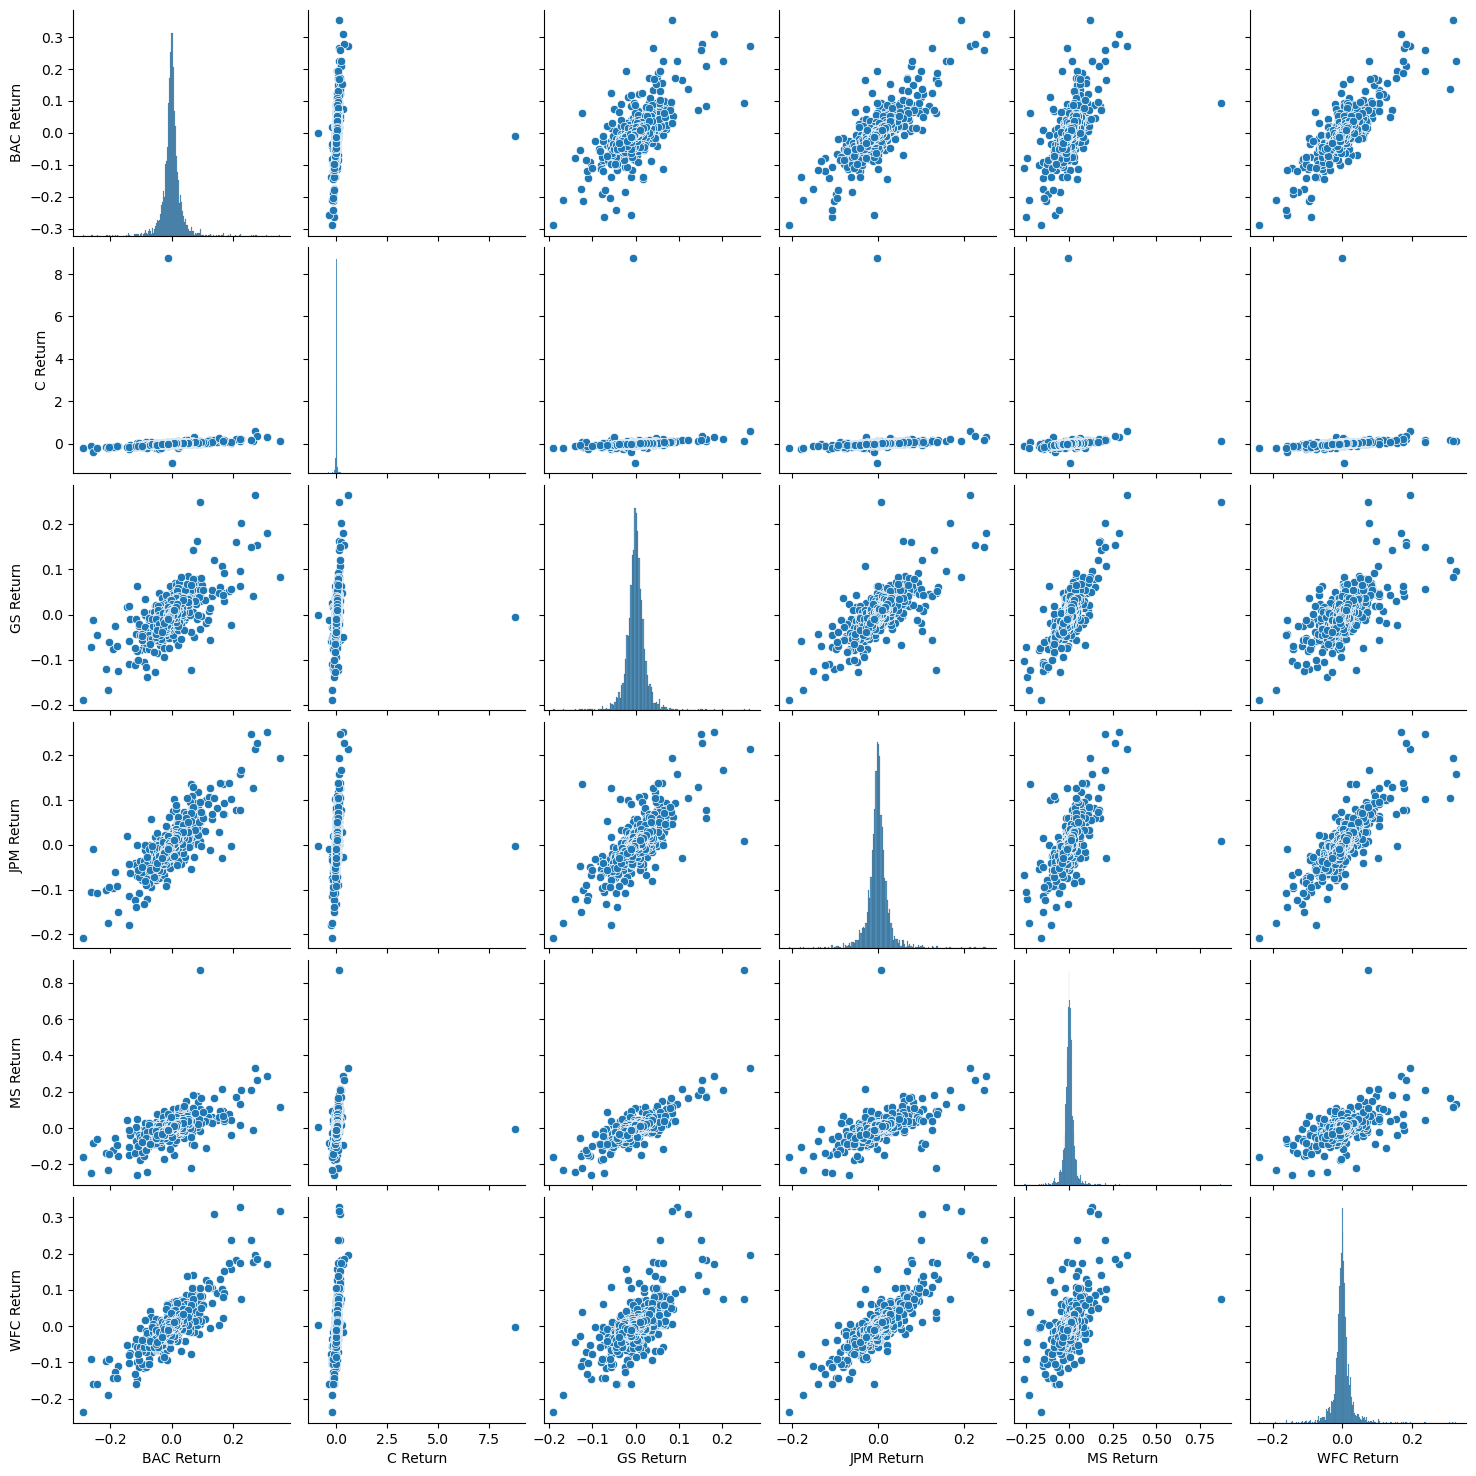

In [26]:
import seaborn as sns
sns.pairplot(returns[1:])




Figuring out the best performance date and worst performance date for each bank, Using the returns dataframe.

In [28]:
returns.idxmin() # for worst performance day

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [29]:
returns.idxmax() # for best performance

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

What about the riskest stocks ??


To know about the riskest assets we will be going to find out the standard deviation
of the return dataframe.

In [31]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

Therefore for the whole data period the C stock is the most riskest

Now for the specific time period say for the year 2015.

In [33]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Thus the riskest asset for the year 2015 is Morgan Stannly

Lets get the distribution of the return of morgan stanly for the year 2015

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


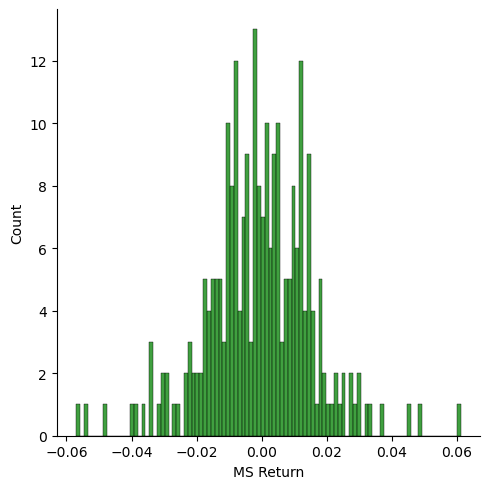

In [34]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)


Lets visualise the close price of each stocks.

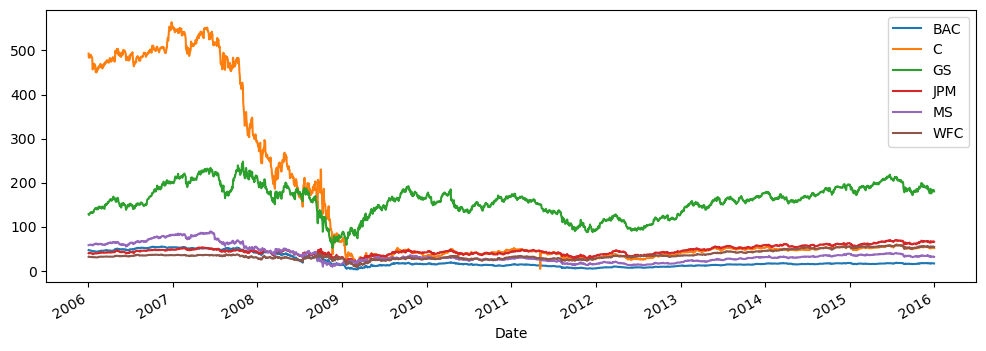

In [37]:
import matplotlib.pyplot as plt
for f in tickers:
    bank_stocks[f]['Close'].plot(figsize=(12,4),label=f)
plt.legend()

### Creating the heatmap or correlation map between stocks close price

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

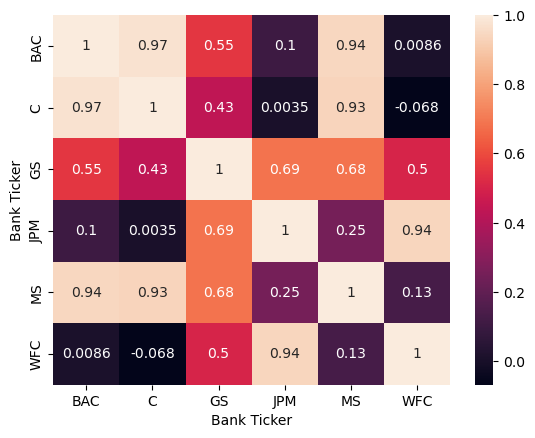

In [38]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)